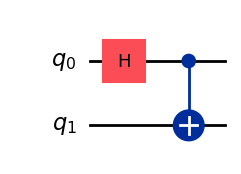

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 

qc.draw("mpl")

 >> Meas output register counts: BitArray(<shape=(), num_shots=1024, num_bits=2>)


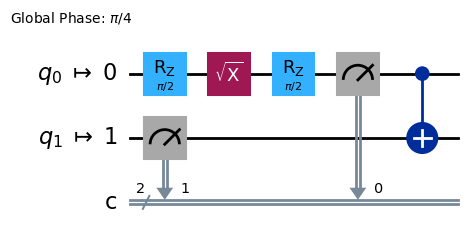

In [2]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
backend = FakeManilaV2()
sampler = Sampler(mode=backend)


# server = QiskitRuntimeService()
# backend = server.least_busy(simulator=True, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)


circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0
circuit.h(0)
circuit.measure([0, 1], [0, 1])

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
circuit.cx(0, 1)

isa_circuit = pm.run(circuit)


job = sampler.run([isa_circuit])
result = job.result()
pub_result = result[0]



print(f" >> Meas output register counts: {pub_result.data.c}")

isa_circuit.draw("mpl", idle_wires=False)





